In [2]:
import os
!pip install opencv-python
import cv2
!pip install keras
!pip install tensorflow

In [3]:
!pip install unrar
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 1.2 MB/s eta 0:00:00


In [4]:
from google.colab import files

uploaded = files.upload()

Saving Dataset.zip to Dataset.zip


In [5]:
import zipfile
zip_file_path = '/content/Dataset.zip'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [6]:
# Paths to train, test, and validation directories
train_dir = "/content/Dataset/Train/Train"
test_dir = "/content/Dataset/Test/Test"
validation_dir = "/content/Dataset/Validation/Validation"

In [7]:
import os
training_ds_path = os.listdir(train_dir)
testing_ds_path = os.listdir(test_dir)
validation_ds_path =  os.listdir(validation_dir)

In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

In [9]:
def plot_random_images(folder_path, rows=4, cols=4):

    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    #print(image_files)

    # Randomly select images to plot
    selected_images = random.sample(image_files, min(rows * cols, len(image_files)))

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    # Plot each selected image
    for i in range(rows):
        for j in range(cols):
            if i * cols + j < len(selected_images):
                img_path = os.path.join(folder_path, selected_images[i * cols + j])
                img = mpimg.imread(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

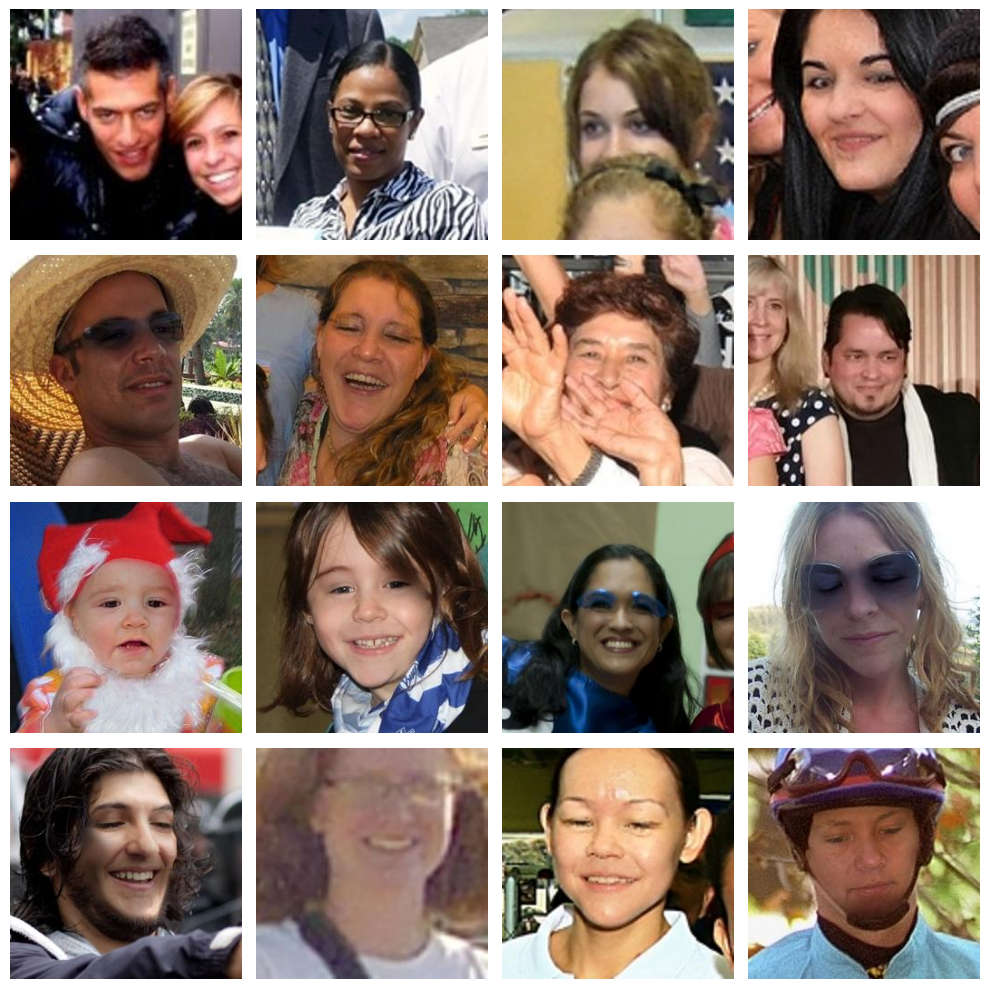

In [10]:
plot_random_images(train_dir)

In [11]:

# Set the path to your dataset
dataset_path = '/content/Dataset/Train/Train'

# Get the list of image filenames
image_filenames = os.listdir(dataset_path)
#print(image_filenames)

# Extract labels from filenames

labels = [1 if 'fake' in filename.lower() else 0 for filename in image_filenames]


# Create a DataFrame for easier handling
import pandas as pd
df = pd.DataFrame({'filename': image_filenames, 'label': labels})


In [12]:
df.head()

,filename,label
0,fake_1047.jpg,1
1,fake_739.jpg,1
2,fake_942.jpg,1
3,real_612.jpg,0
4,real_597.jpg,0


In [13]:

df['label'].value_counts()

0    1207
1    1206
Name: label, dtype: int64

In [14]:
df.dtypes

filename    object
label        int64
dtype: object

In [15]:
# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Convert the label column to string
train_df['label'] = train_df['label'].astype(str)
val_df['label'] = val_df['label'].astype(str)


In [16]:
# Create data generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [17]:
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=dataset_path,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 1929 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [18]:
validation_generator = validation_datagen.flow_from_dataframe(
    val_df,
    directory=dataset_path,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 483 validated image filenames belonging to 2 classes.
